# **PowerPulse**: Household Energy Usage Forecast.



* Data Understanding & Data Exploration:-

In [2]:
# First Import all Necessary Libraries for Data analysis & visualization.:-
import pandas as pd  # Data Manipulation & Analysis.
import matplotlib.pyplot as plt # Ploting & Visualizations.
import numpy as np  # Uesd for Numerical operations.
import seaborn as sns # Statistical & Data visualization.
from datetime import datetime # Handling & formatting date/time data.

# 1. Load & Explore the dataset to understand its structure, variables and Quality.

In [4]:
# Loads the dataset from the specified file path:-
Household_power_consumption_File_path = "/content/drive/MyDrive/GUVI/household_power_consumption.txt"

In [5]:
# Read the CSV file with some Custom Parameters:-
df = pd.read_csv(Household_power_consumption_File_path, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)

<ipython-input-5-a0c01fa0db3e>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(Household_power_consumption_File_path, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
<ipython-input-5-a0c01fa0db3e>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(Household_power_consumption_File_path, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
<ipython-input-5-a0c01fa0db3e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True`

 Uses sep=';' because the dataset is separated by semicolons (;). Handles missing values (na_values=["?"]). Combines the "Date" and "Time" columns into a single "datetime" column. Uses infer_datetime_format=True to automatically detect date formats.

In [6]:
df1 = df # You Assigned df to df1

# 2.Perform Exploratory data analysis (EDA) to identifying patterns, correlations, and outliers.

In [7]:
df1.head() # Display the first 5 rows of df1

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
df1.tail() # Display the last 5 rows of df1

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [9]:
df1.info() # Displays Information about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


Displays information about the dataset, including column names, data types, and the number of non-null values. Helps us identify missing values and incorrect data types

In [10]:
df1.shape # Check the shape (Rows & Columns) of the df1

(2075259, 8)



* Data Preprocessing:-

# 3.Handle missing or Inconsistent data


In [11]:
df1.isnull().sum() # Display the number of missing (NaN) values in each column of df1

,0
datetime,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


**OBSERVATION:**

Since Data have 25,979 missing rows, it was time series data,so best method was

**Forward Fill (Best for Time-Series)**

✅ Uses the last known valid value

✅ Works well if data is continuous and missing values are in blocks

**Best Approach?**

If missing values are in long gaps → Forward Fill (ffill)

If missing values are scattered randomly → Mean/Median

If you expect gradual change → Interpolation

In [12]:
missing_data = df1[df1.isnull().any(axis=1)] # Checks any row that contains at least one NaN (missing value)
print(missing_data)

                   datetime  Global_active_power  Global_reactive_power  \
6839    2006-12-21 11:23:00                  NaN                    NaN   
6840    2006-12-21 11:24:00                  NaN                    NaN   
19724   2006-12-30 10:08:00                  NaN                    NaN   
19725   2006-12-30 10:09:00                  NaN                    NaN   
41832   2007-01-14 18:36:00                  NaN                    NaN   
...                     ...                  ...                    ...   
1990185 2010-09-28 19:09:00                  NaN                    NaN   
1990186 2010-09-28 19:10:00                  NaN                    NaN   
1990187 2010-09-28 19:11:00                  NaN                    NaN   
1990188 2010-09-28 19:12:00                  NaN                    NaN   
2027411 2010-10-24 15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839         NaN             

Missing values appear in random time intervals rather than continuous blocks. This means a single imputation method may not be optimal. Instead, a combination of techniques will work best.

**Best Strategy for our Data:**

Forward Fill (ffill) – Works for short gaps.

Backward Fill (bfill) – Fills remaining missing values.

Interpolation (linear) – For gradual trends.

**Method to Use?**

If gaps are small (few minutes to hours) → Use ffill() + bfill() + interpolate()

If gaps are large (days/weeks) → Mean/Median Imputation

In [13]:
# Forward fill for continuous time-series Data:-
df1.fillna(method='ffill', inplace=True)

<ipython-input-13-2d6303bb6804>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)


Works well for time-series data, where the previous reading is usually a good estimate for the missing one.

# 4. Data Statistics & Outlier Detection

In [14]:
df1.isnull().sum() # Show the count of missing values (NaN) per column in df1.

,0
datetime,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


Returns key statistics like mean, median, min, max, and standard deviation for each numerical column. Helps understand the range and distribution of the data.

In [15]:
df1.describe() # Will Display the Statistical Computing:-

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-06 07:12:59.999994112,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00


**OBSERVATION**

**Outliers:**

Columns like Sub_metering_1 and Sub_metering_2 have very high maximum values compared to their 75th percentiles, suggesting the presence of outliers.

Global_intensity also has a high maximum value (48.4) compared to its 75th percentile (6.4), indicating potential outliers.

**Zero Values:**

Columns like Sub_metering_1 and Sub_metering_2 have a significant number of zero values (25th, 50th, and 75th percentiles are 0.0), which might represent periods of no activity.

In [16]:
df = df1 # Existing df1 into another variable df

In [17]:
numerical_columns = df.select_dtypes(include=['number']).columns # selects all numerical_columns from the df.
numerical_columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# 5.Checks for the Outlier using Box Plot & Histogram visualization

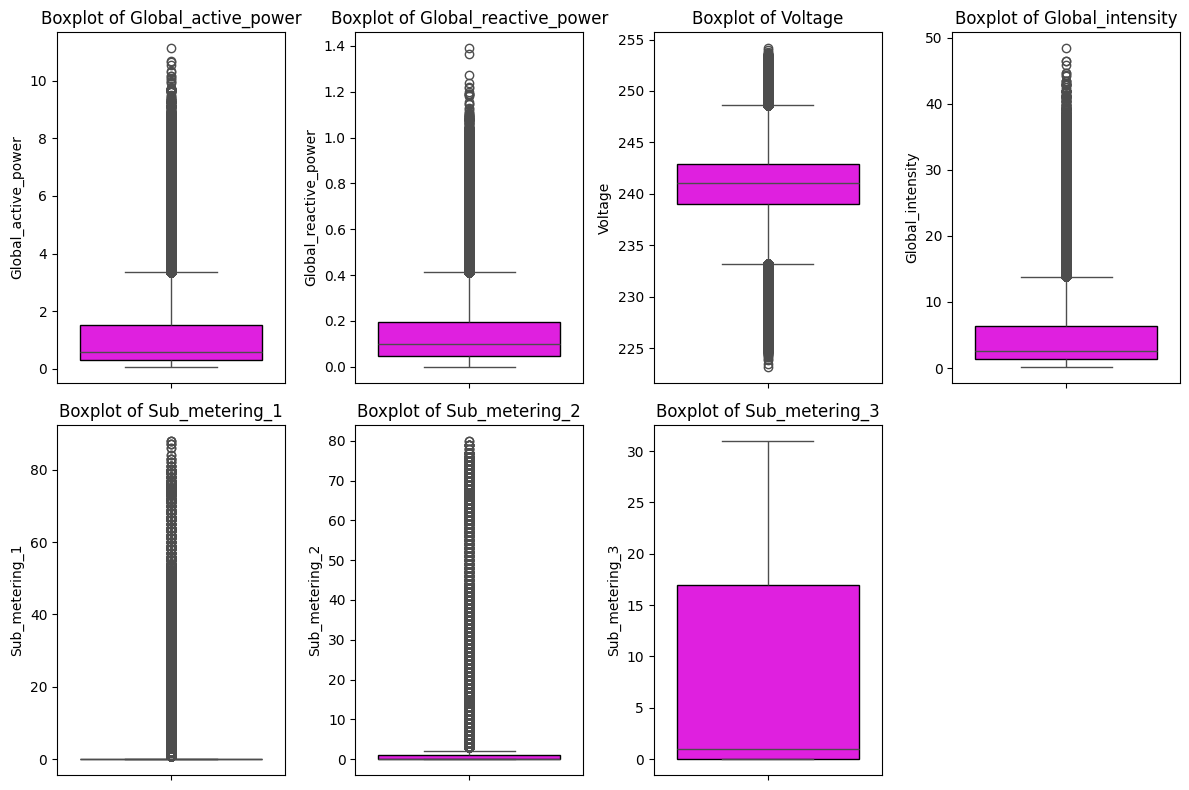

In [18]:
# Boxplot for each Numerical Feature:-
plt.figure(figsize=(12,8)) # Specifies the width and height of the plot in Inches.
for i, column in enumerate(numerical_columns, 1):# For loop that iterates through the list of(numerical_columns)& performs an operation for each column.
    plt.subplot(2, 4, i)  # Create a subplot for each variable.
    sns.boxplot(df[column],color = 'fuchsia',boxprops=dict(edgecolor='k'))
    plt.title(f'Boxplot of {column}') # Dynamically adds a title for each boxplot.
plt.tight_layout() # Ensures plots do not overlap and are properly spaced.
plt.show() # Displays the final boxplots.

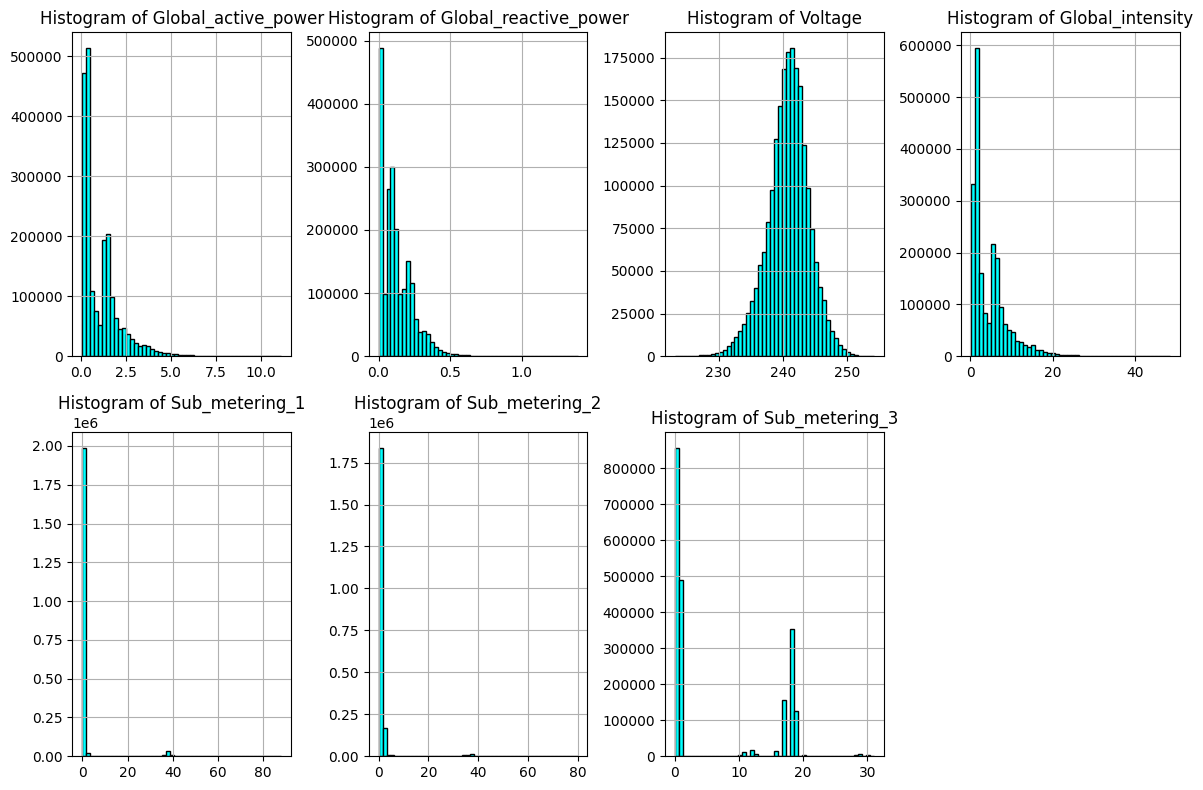

In [19]:
# Histogram for each Numerical Feature:-
plt.figure(figsize=(12, 8)) # Specifies the width and Height of the plot in Inches.
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable.
    df[column].hist(bins=50, color='cyan', edgecolor='k')
    plt.title(f'Histogram of {column}') # Dynamically adds a title for each Histogram.
plt.tight_layout() # Ensures plots do not overlap and are properly spaced.
plt.show() # Displays the final Histogram.

**OBSERVATION**

histograms & boxplots show the Distribution & potential outliers dataset.

** Here are some key observations:**

**Global_active_power & Global_intensity:**

The histograms suggest a multimodal distribution. The boxplots indicate some potential outliers.

**Global_reactive_power:**

The distribution is skewed with a concentration of values near zero. The boxplot suggests a right-skewed distribution.

**Voltage:**

The histogram looks normally distributed, but the scale seems unusual (e.g., large numbers).The boxplot shows some extreme values at both ends.

**Sub_metering variables:**

The histograms for Sub_metering_1 and Sub_metering_2 suggest most values are concentrated around zero. Sub_metering_3 has more spread-out values. The boxplots highlight possible outliers.

In [20]:
df.select_dtypes(include=['number']).skew() # calculates the skewness of each numerical column in the df.

,0
Global_active_power,1.797454
Global_reactive_power,1.265232
Voltage,-0.323726
Global_intensity,1.860937
Sub_metering_1,5.983578
Sub_metering_2,7.135711
Sub_metering_3,0.736887


OBSERVATION If skewness is high (>1 or <-1), the data is highly skewed and might need transformation

**Key Observations Skewness:**

Most columns (Global_active_power, Global_reactive_power, Global_intensity, Sub_metering_1, Sub_metering_2) are highly positively skewed, indicating the presence of outliers or extreme values.

Voltage is slightly negatively skewed, while Sub_metering_3 is moderately positively skewed.

**Potential Causes of Outliers:**

Outliers in power-related columns (Global_active_power, Global_reactive_power, Global_intensity) could be due to sudden spikes in energy usage.

Outliers in sub-metering columns (Sub_metering_1, Sub_metering_2) might represent unusual appliance usage patterns.

# Potential Causes of Outliers:

Outliers in power-related columns (Global_active_power, Global_reactive_power, Global_intensity) could be due to sudden spikes in energy usage.

Outliers in sub-metering columns (Sub_metering_1, Sub_metering_2) might represent unusual appliance usage patterns.

In [21]:
print("\nUnique Values in Sub_metering_1:", df['Sub_metering_1'].nunique())# Unique values in the Sub_metering_1 column of the df.
print("\nValue Counts:") # Will Display tha text,not the actual value counts.
print(df['Sub_metering_1'].value_counts().head(10)) # Display the top 10 Most frequent values in the Sub_metering_1 column of df.


Unique Values in Sub_metering_1: 88

Value Counts:
Sub_metering_1
0.0     1903013
1.0       84939
2.0       22150
38.0      16121
37.0      14893
39.0       6504
36.0       5270
35.0       1359
40.0       1159
32.0        802
Name: count, dtype: int64


**OBSERVATION:**

Prints the number of unique values in Sub_metering_1. Displays the top 10 most common values in the column.

Why?

Helps us understand how many different categories exist in this column.

Sub_metering_1, Sub_metering_2, and Sub_metering_3 are highly zero-dominated (a large portion of the values are 0.0). Their distributions look more categorical/discrete than continuous. Extreme imbalance: Some values (e.g., 38.0, 37.0, etc.) appear frequently, while others are rare.

Transformations won’t be very effective due to the large presence of zeros.

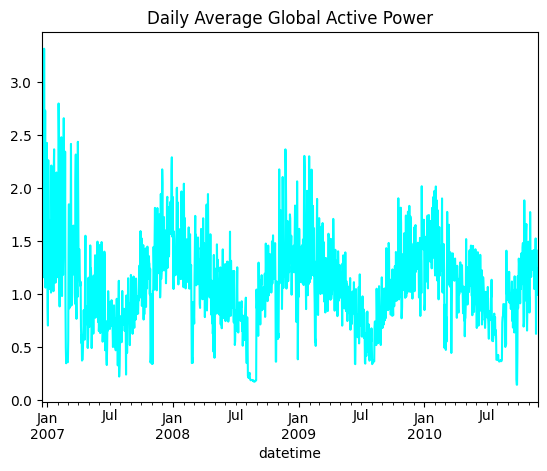

In [22]:
# Daily Average Global Active Power Time-Series Plot:-
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
# Resample & plot.
df.resample('D')['Global_active_power'].mean().plot(color = 'cyan')
plt.title("Daily Average Global Active Power") # Sets the title of the plot.
plt.show() # Displays the final time-series plot.

In [23]:
df.info() #  Provides full information about df.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [25]:
df = df.reset_index() # Resets the index of the df.

# Feature Engineering: Extract date-time features

# 6. Parse date and time into separate features

In [26]:
# Provided is extracting various time-related features from the datetime column in your df.
df["year"] = df["datetime"].dt.year # New column Year containing the year of each date in the datetime column.
df["month"] = df["datetime"].dt.month # New column Month containing the month (1–12) of each date.
df["day"] = df["datetime"].dt.day # New column Day containing the day of the month (1–31) of each date.
df["hour"] = df["datetime"].dt.hour # New column Hour containing the hour (0–23) of each timestamp.
df["weekday"] = df["datetime"].dt.weekday # New column Weekday containing the day of the week as an integer (0 for Monday,6 for Sunday).

Extracts year, month, day, hour, and weekday from the datetime column.These features help the model capture seasonal patterns in energy consumption.

In [27]:
df["weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0) # New column Weekend where it assigns 1 if the day is a Saturday or Sunday(i.e., weekday >= 5) & 0 for weekdays.

# Create additional features


# 7. Creating New Features such as Daily averages, peak hours, or Rolling Averages.

In [28]:
# Calculate the daily average power:
df["daily_avg_power"] = df.groupby(df["datetime"].dt.date)["Global_active_power"].transform("mean")
# Calculate & Identify peak hours (between 5 PM and 9 PM):
df["peak_hour"] = df["hour"].apply(lambda x: 1 if 17 <= x <= 21 else 0)
# Calculate the rolling average power (for a window of 60 data points):
df["rolling_avg_power"] = df["Global_active_power"].rolling(window=60, min_periods=1).mean()

daily_avg_power → Calculates daily average power consumption. peak_hour → Marks peak energy hours (5 PM to 9 PM) as 1, otherwise 0. rolling_avg_power → Computes a moving average over a 60-minute window.


# Visualization of energy Trends.

# 8. Visualizing Yearly Trends

<ipython-input-29-aad332394ae4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='Global_active_power', estimator='mean', ci=None,color='cyan')


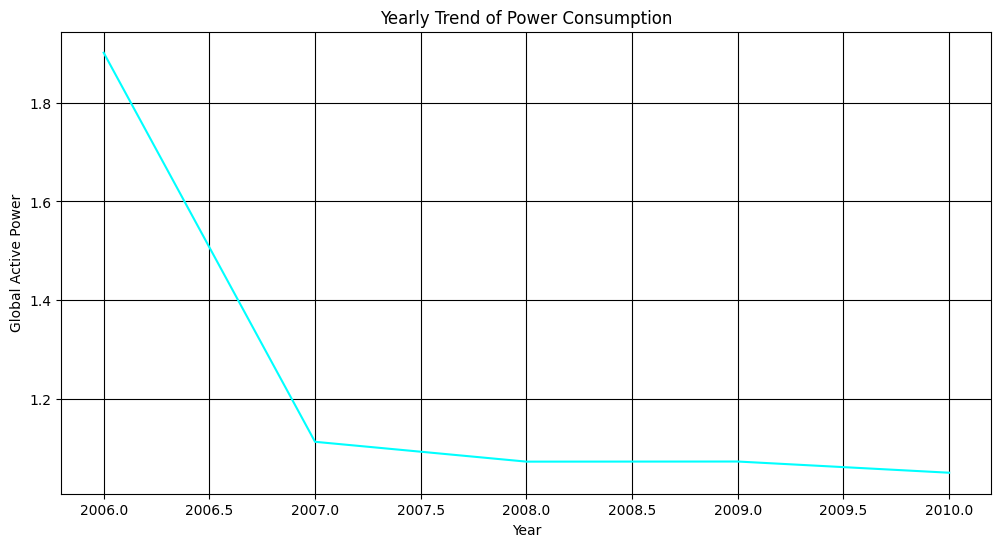

In [29]:
# Yearly Trend of Power Consumption Line Plot using Seaborn :-
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='Global_active_power', estimator='mean', ci=None,color='cyan')
plt.title("Yearly Trend of Power Consumption") # Sets the title of the plot.
plt.xlabel("Year") # Sets the x-axis label to "Year"
plt.ylabel("Global Active Power") # Sets the y-axis label to "Global Active Power"
plt.grid(True, color='k') # Customize the gridlines & color
plt.show()

OBSERVATION:

Plots a line graph showing the average energy consumption per year.Helps identify long-term trends in power usage.

Graph shows a consistent decrease in power consumption from 2006 to 2010 and decline could be due to factors like energy efficiency improvements, changes in household behaviors, or external economic influences

# 9. Visualizing Monthly Patterns

<ipython-input-30-9a6a891d4055>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='Global_active_power', estimator='mean', ci=None,color = 'magenta')


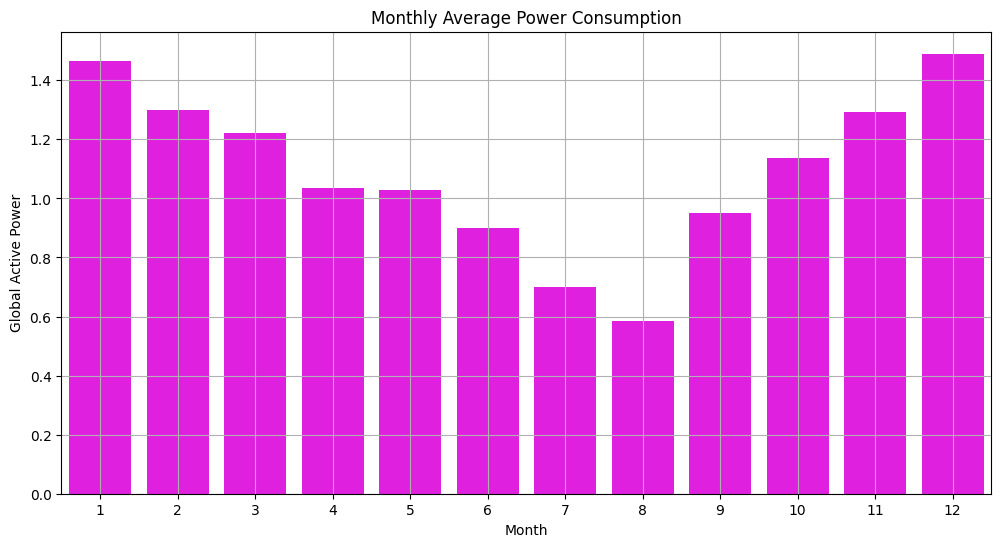

In [30]:
# Monthly Average Power Consumption Bar Plot using Seaborn:-
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='Global_active_power', estimator='mean', ci=None,color = 'magenta')
plt.title("Monthly Average Power Consumption")
plt.xlabel("Month")
plt.ylabel("Global Active Power")
plt.grid()
plt.show()

**Observations:**

Creates a bar plot showing the average power usage per month. Helps see if there are seasonal changes in power consumption.

**Winter Peak (January & December):**

Power consumption is highest in January and December, indicating increased usage, likely due to heating needs.

**Summer Dip (June to August):**

Consumption is lowest in July and August, suggesting reduced electricity usage, possibly due to less heating demand.

Gradual Increase from September to December: After the summer dip, power usage starts increasing steadily from September onward.

**Symmetry in Seasonal Trends:**

The trend follows a U-shaped pattern, where consumption is higher in colder months and lower in warmer months.

**Possible Explanations:**

Heating appliances in winter lead to increased power consumption.

Lower energy needs in summer due to reduced heating and possibly higher outdoor activities.

Transitional seasons (Spring & Autumn) have moderate consumption.

This seasonal variation is useful for forecasting energy demand and optimizing power distribution.

In [31]:
weekly_trend = df.groupby(df["datetime"].dt.isocalendar().week)["Global_active_power"].mean()
weekly_trend.head()

,Global_active_power
week,
1,1.356829
2,1.458509
3,1.554696
4,1.474168
5,1.547953


# 10. Week-wise Power Consumption Trend

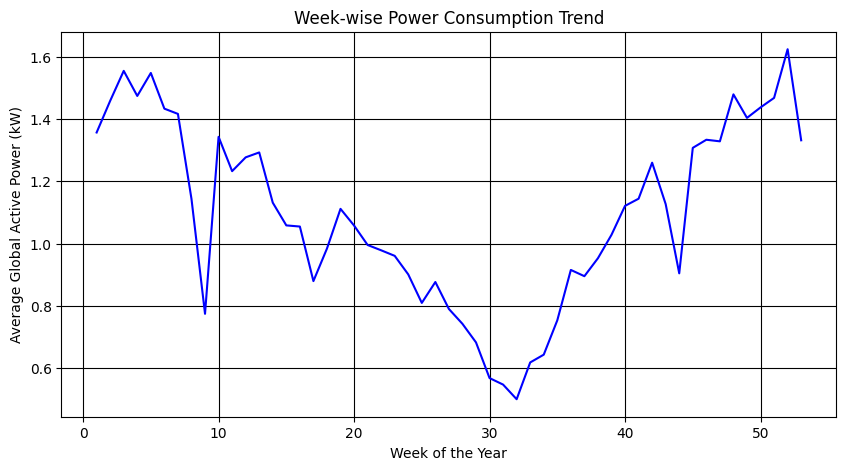

In [32]:
# Week-wise Power Consumption Trend Line Plot:-
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend",color = 'blue')
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid(True, color='k')
plt.show()

**key observations **

Groups power consumption by week and calculates the average power usage. Plots a line chart to see weekly power consumption patterns. Helps identify high-usage weeks in the year.

**Fluctuations in Consumption: **

There are significant fluctuations in power consumption throughout the year, with notable peaks and drops.

**Early-Year Peak & Mid-Year Dip:**

 Power consumption is relatively high at the beginning, reaching its peak within the first few weeks, followed by a sharp decline around week 10.

**Mid-Year Low Point:**

 The lowest consumption levels occur between weeks 25–30.

**Gradual Recovery & Late-Year Peaks: **

After the mid-year dip, power usage increases steadily, with noticeable peaks around weeks 40 and 50.

**Seasonal Influence:**

 The trend suggests possible seasonal variations in energy consumption, potentially due to weather changes affecting heating or cooling needs.

In [33]:
daily_trend = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()
daily_trend.head() # Shows that for each date, the average power consumption is calculated.

,Global_active_power
datetime,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658



# 11.Daily Trend Analysis

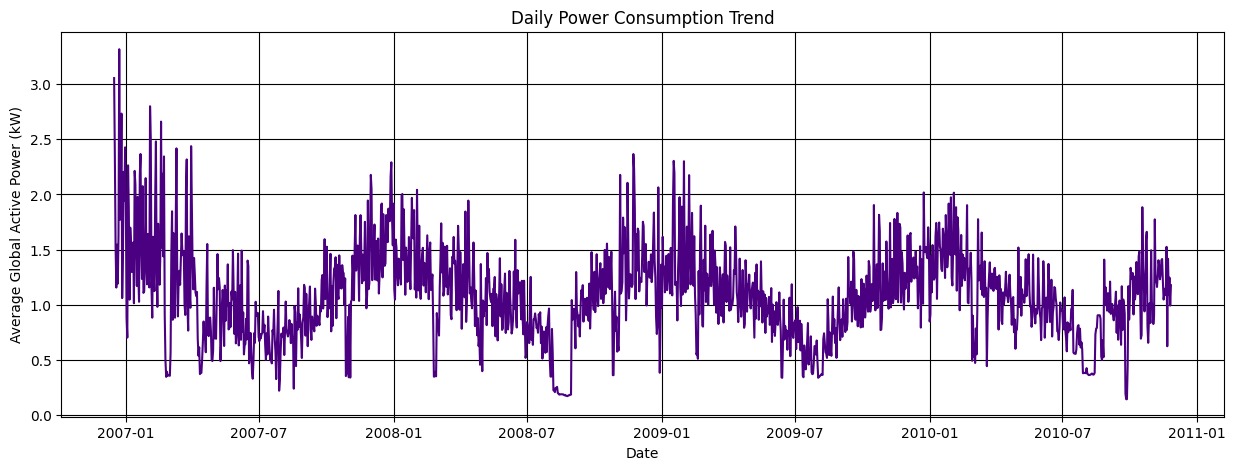

In [34]:
# Daily Power Consumption Trend Line Plot:-
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend",color = 'indigo')
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid(True, color='k')
plt.show()


**Key observations from the Daily Power Consumption Trend plot:**

Groups power usage by date and calculates the daily average.

Plots a line chart to visualize daily variations in power consumption.

**Overall Declining Trend (2007–2010): **

The power consumption appears to decrease gradually over time, with some fluctuations.

**High Initial Consumption (Early 2007): **

There is a significant peak in power consumption at the beginning of the dataset, with values exceeding 3.0 kW.

**Seasonal or Cyclical Patterns: **

The data shows periodic rises and falls, possibly indicating seasonal variations or external influencing factors.

**Mid-2008 to Mid-2009 Dip: **

A notable low in power consumption occurs during this period, followed by a gradual increase again.

**Fluctuations in Late 2010: **

Towards the end of the dataset, there are increased variations in power usage, suggesting potential seasonal or behavioral influences.

# 12.Hourly Power Consumption Trends

<ipython-input-35-798d4543dbdf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='hour', y='Global_active_power', estimator='mean', ci=None,color = 'lime')


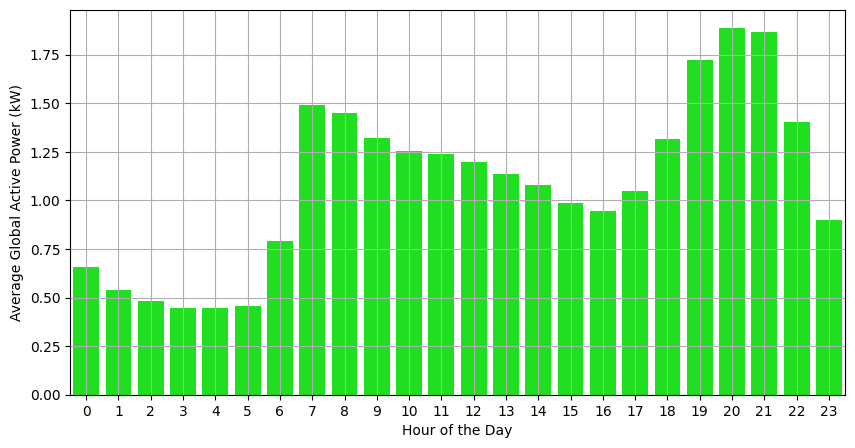

In [35]:
# Hourly Average Power Consumption Bar Plot:-
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='Global_active_power', estimator='mean', ci=None,color = 'lime')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

**Key observations from the Hourly Power Consumption Trend plot:**

Creates a bar plot showing power consumption by hour of the day. Helps identify peak energy hours

**Lowest Consumption (Midnight to Early Morning, 0–6 AM): **

Power usage is at its lowest during these hours, likely due to minimal household activity.

**Morning Surge (7–9 AM):**

There is a sharp increase in power consumption, probably due to morning routines like cooking, heating, and appliance usage.

**Daytime Stability (10 AM – 4 PM):**

Power consumption remains relatively stable but slightly decreases during the afternoon.

**Evening Peak (6–9 PM): **

The highest power usage occurs in the evening, with a peak around 8–9 PM, likely due to increased household activity such as cooking, lighting, and entertainment.

**Decline After 9 PM: **

Consumption gradually decreases after the peak, but it remains higher than early morning levels.

# 13.Weekday vs. Weekend Power Consumption

<ipython-input-36-b6d09cddf4f3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='Global_active_power', hue='weekend', estimator='mean', ci=None)


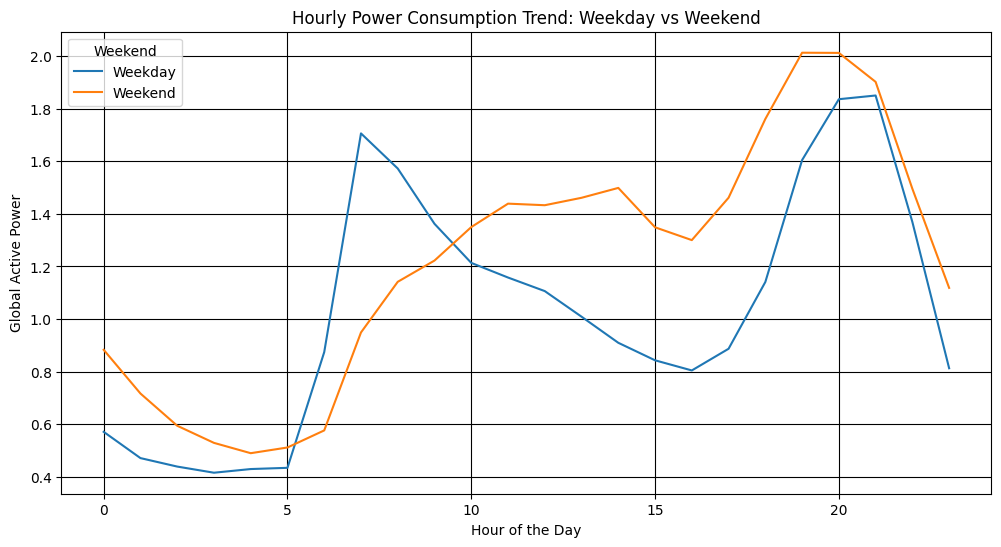

In [36]:
# Compare weekday vs weekend power consumption with the line plot:-
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='Global_active_power', hue='weekend', estimator='mean', ci=None)
plt.title("Hourly Power Consumption Trend: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Global Active Power")
plt.legend(title="Weekend", labels=["Weekday", "Weekend"])# Used to add a legend to the plot.
plt.grid(True, color='k')
plt.show()

Key observations from the Power Consumption Trend: Weekday vs Weekend plot:


compares hourly power usage trends between weekdays and weekends. Helps understand if weekend energy usage is different

**Weekday Early Morning Dip (0–5 AM): **

Power consumption is lower during early morning hours on weekdays compared to weekends, likely because people wake up later on weekends.

**Sharp Weekday Morning Spike (6–9 AM):**

There is a steep increase in power usage during weekday mornings, likely due to early morning routines before work and school. Steady Weekend Increase (6 AM – 12 PM): Unlike weekdays, weekends show a more gradual rise in power usage throughout the morning, indicating a slower start to the day.

**Afternoon Decline on Weekdays (12–17 PM): **

Power consumption steadily decreases during work hours on weekdays, while it remains relatively stable on weekends.

**Evening Peak (18–21 PM): **

Both weekdays and weekends exhibit peak power consumption in the evening, but the weekend peak is slightly higher, possibly due to more at-home activities like entertainment and cooking.

**Faster Decline After 9 PM on Weekdays: **

Weekday consumption drops sharply after 9 PM, while weekend usage remains elevated for a longer period before gradually declining.

**Dropping the datetime Column Before Training**

In [37]:
df.drop(columns=["datetime"], inplace=True) # Removes the "datetime" column from the df
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,weekday,weekend,daily_avg_power,peak_hour,rolling_avg_power
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5,1,3.053475,1,4.216000
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5,1,3.053475,1,4.788000
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5,1,3.053475,1,4.983333
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5,1,3.053475,1,5.084500
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5,1,3.053475,1,4.800800


# 14. Feature Importance Visualization-correlation heatmaps and pair plots

Heatmap: Highlights correlations between Global Active Power and other features.

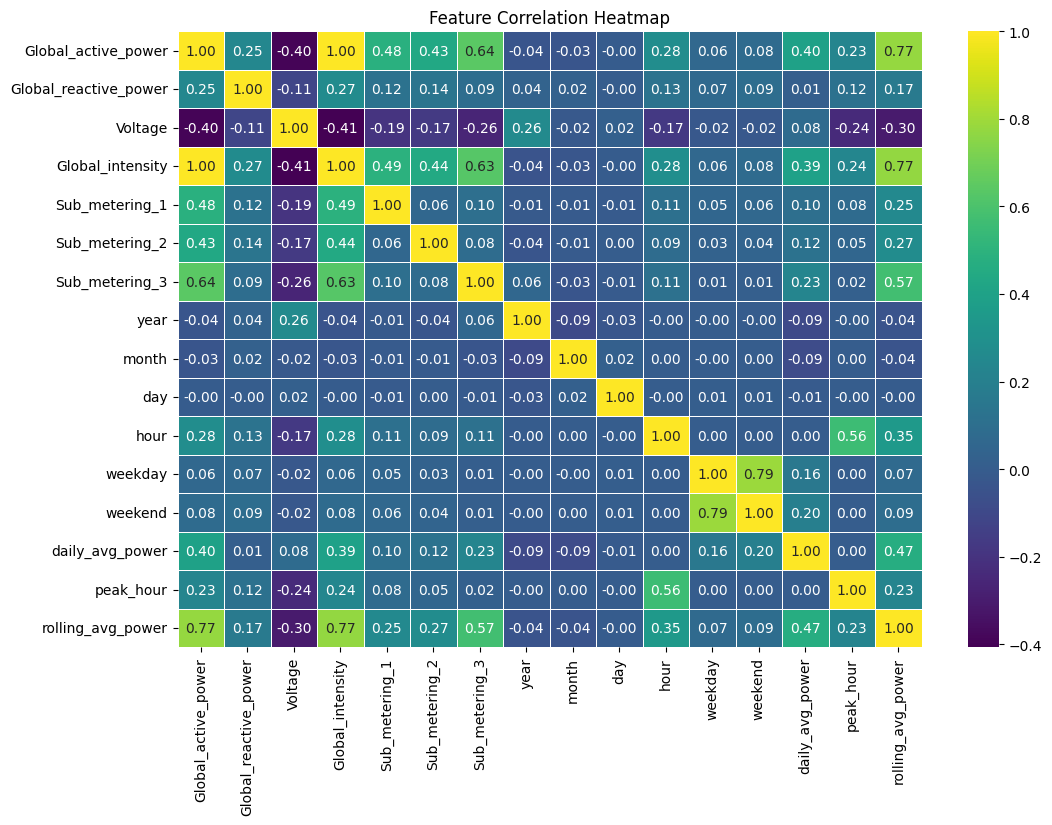

In [38]:
# Correlation heatmap to identify key influencing factors:-
plt.figure(figsize=(12, 8))
corr_matrix = df.corr() # Calculates the Correlation matrix for df.
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5) # Show the color of the bar.
plt.title("Feature Correlation Heatmap")
plt.show()

**OBSERVATION:**

**Strong Correlation with Global Active Power:**

Global Intensity (0.64): This makes sense as power consumption is directly related to current. Sub_metering_3 (0.64): Indicates that this sub-metered area contributes significantly to overall power usage. Rolling Average Power (0.33) & Daily Average Power (0.40): These engineered features show some relationship with Global Active Power.

**Negative Correlation:**

Voltage (-0.40): A notable inverse relationship, indicating that higher voltages might be associated with lower power consumption.

**Temporal Features:**

Hour (0.28): Suggests that power usage fluctuates based on time of day. Peak Hour (0.23): Confirms that consumption increases during peak usage periods.

**Weak or No Correlation:**

Year, Month, Day, and Weekday have very weak correlation, implying seasonal variations may not have a strong direct impact on short-term power fluctuations.

# 15.Feature Selection Using Mutual Information

Calculates Mutual Information Scores to measure how much each feature influences power consumption. Sorts the most important features

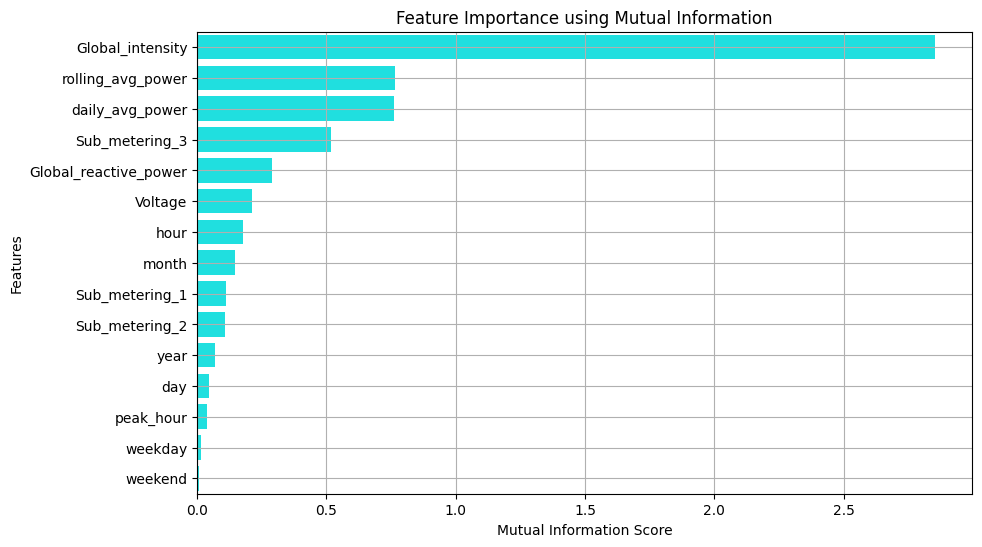

In [42]:
from sklearn.feature_selection import mutual_info_regression

# Mutual Information for Feature Selection
x = df.drop(columns=["Global_active_power"])
y = df["Global_active_power"]
mi_scores = mutual_info_regression(x,y)
mi_scores = pd.Series(mi_scores, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index,color = 'cyan')
plt.title("Feature Importance using Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.grid()
plt.show()

**OBSERVATION from Feature Selection:**

Global Intensity Dominates

The Global_intensity feature has the highest mutual information score, indicating a strong relationship with Global_active_power. This suggests that current intensity is a major predictor of power consumption. Daily and Rolling Averages are Significant

daily_avg_power and rolling_avg_power contribute significantly, meaning that past consumption patterns influence future power usage.

Sub-metering and Reactive Power Contribute Moderately

Sub_metering_3, Sub_metering_1, Sub_metering_2, and Global_reactive_power show some relevance but are not the top predictors.

Time-Based Features Matter

Features like hour, month, and weekday contribute, though with lower scores. This suggests that power usage varies with time but is not the strongest determinant.

Weekend and Peak Hour Effects are Minimal

weekend and peak_hour have negligible influence, meaning power consumption patterns may not change significantly between weekdays and weekends.

# 16. Define target variable and feature

In [ ]:
x = df[["Global_intensity",'Sub_metering_1','Sub_metering_2','Sub_metering_3','Voltage']] # Selects multiple feature columns from the df & assigns them to x.
y = df["Global_active_power"] # Select the "Global_active_power" column as the target variable.

Using only the most relevant features helps improve model accuracy.

In [ ]:
x.head()

,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,18.4,0.0,1.0,17.0,234.84
1,23.0,0.0,1.0,16.0,233.63
2,23.0,0.0,2.0,17.0,233.29
3,23.0,0.0,1.0,17.0,233.74
4,15.8,0.0,1.0,17.0,235.68


In [ ]:
y.head()

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV # Splits your dataset into training and testing sets.

**Model Selection and Training:**

# 17 .Splitting Data into Training & Testing Sets

In [ ]:
# Split the dataset into training and testing sets --> Splitting data (80% train,20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

Splits the dataset into training (70%) and testing (30%) sets. Helps train the model on one part of the data and test it on unseen data.

# 18 .Feature Scaling for Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean and scaling to unit variance.
# used to normalize (scale) numerical features in machine learning models.

In [ ]:
# Normalize features for neural networks only:-
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Standardizes the features by converting them to zero mean and unit variance. Neural networks work better with scaled data, preventing large values from dominating smaller ones.tree-based models (RandomForest, GradientBoosting) do not require scaling

In [ ]:
# Start Importing all Libraries to a perform machine learning operation:-
from sklearn.linear_model import LinearRegression # Create an instance of LinearRegression and fit it to data
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor # Used multiple decision trees to improve prediction accuracy,Builds trees sequentially,improving errors step by step.
from sklearn.preprocessing import MinMaxScaler # Used to scale numerical features into a specific range, typically [0,1].
from sklearn.neural_network import MLPRegressor # Used to create a Multi-layer Perceptron model for regression tasks.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

**Train regression models**

# 19. Defining Machine Learning Models

In [ ]:
# Define & Initialized with specific Hyperparameters models:-
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=30),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=30),
    "NeuralNetwork": MLPRegressor(random_state=30, max_iter=200)}

Defines four different regression models: Linear Regression (Baseline Model). Random Forest Regressor (Tree-based model for capturing non-linear patterns). Gradient Boosting Regressor (Boosting model for better accuracy). Neural Network (MLP Regressor) (Deep learning approach).

# 20.Training Models (Before Hyperparameter Tuning)

In [ ]:
# Train models before Hyperparameter tuning:-
trained_models = {}
for name, model in models.items():
    if name == "NeuralNetwork":
        model.fit(x_train_scaled, y_train)
    else:
        model.fit(x_train, y_train)
    trained_models[name] = model

Trains all models on the training data. If the model is a neural network, it uses scaled data (x_train_scaled). Stores the trained models in trained_models.

# 21. Model Evaluation Function

In [ ]:
# Evaluate models before hyperparameter tuning
def evaluate_model(model, x_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(x_test_scaled)
    else:
        y_pred = model.predict(x_test)
    return {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-squared": r2_score(y_test, y_pred)}

Defines a function to evaluate models using: Root Mean Squared Error (RMSE) → Measures model error. Mean Absolute Error (MAE) → Average absolute error. R-squared (R²) → How well the model explains variance. Uses scaled data for neural networks.

# 22. Evaluating Models Before Tuning

In [ ]:
Evaluations_before_tuning = {name: evaluate_model(model, x_test, y_test, scaled=(name == "NeuralNetwork")) for name, model in trained_models.items()}
print("Evaluation Before Hyperparameter Tuning:", Evaluations_before_tuning)

Evaluation Before Hyperparameter Tuning: {'LinearRegression': {'RMSE': 0.044376853264235974, 'MAE': 0.029539562263289333, 'R-squared': 0.9982189710188145}, 'RandomForestRegressor': {'RMSE': 0.03867669163093655, 'MAE': 0.02351046127693358, 'R-squared': 0.9986471282901616}, 'GradientBoostingRegressor': {'RMSE': 0.037172312786398674, 'MAE': 0.024106097390248542, 'R-squared': 0.9987503248171723}, 'NeuralNetwork': {'RMSE': 0.035468260982032526, 'MAE': 0.022881228557203058, 'R-squared': 0.9988622737708825}}


In [ ]:
print("Evaluation Before Hyperparameter Tuning:")
for model_name, metrics in Evaluations_before_tuning.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Evaluation Before Hyperparameter Tuning:

Model: LinearRegression
  RMSE: 0.0444
  MAE: 0.0295
  R-squared: 0.9982

Model: RandomForestRegressor
  RMSE: 0.0387
  MAE: 0.0235
  R-squared: 0.9986

Model: GradientBoostingRegressor
  RMSE: 0.0372
  MAE: 0.0241
  R-squared: 0.9988

Model: NeuralNetwork
  RMSE: 0.0355
  MAE: 0.0229
  R-squared: 0.9989


# 23.Perform hyperparameter tuning to optimize model performance.

In [ ]:
# Hyperparameter tuning (RandomizedSearchCV for efficiency)
param_grids = {
    "RandomForestRegressor": {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    "GradientBoostingRegressor": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "NeuralNetwork": {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'alpha': [0.0001]}}

Defines hyperparameter search spaces for: Random Forest (n_estimators, max_depth, etc.). Gradient Boosting (learning_rate, max_depth, etc.). Neural Network (hidden_layer_sizes, activation, etc.)

# 24. Running Hyperparameter Tuning

In [ ]:
tuned_models = {}
for name, model in trained_models.items():
    if name in param_grids:
        search = RandomizedSearchCV(model, param_grids[name], cv=2, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=5)
        if name == "NeuralNetwork":
            search.fit(x_train_scaled, y_train)
        else:
            search.fit(x_train, y_train)
        tuned_models[name] = search.best_estimator_
    else:
        tuned_models[name] = model

Uses RandomizedSearchCV (more efficient than GridSearchCV) to find the best hyperparameters. Cross-validates (cv=2) to prevent overfitting. Stores optimized models in tuned_models.

# 25. Evaluate models using appropriate metrics (e.g., RMSE, MAE, R-squared).

In [ ]:
# Evaluate models after hyperparameter tuning
evaluations_after_tuning = {name: evaluate_model(model, x_test, y_test, scaled=(name == "NeuralNetwork")) for name, model in tuned_models.items()}
print("Evaluation After Hyperparameter Tuning:", evaluations_after_tuning)

Evaluation After Hyperparameter Tuning: {'LinearRegression': {'RMSE': 0.044376853264235974, 'MAE': 0.029539562263289333, 'R-squared': 0.9982189710188145}, 'RandomForestRegressor': {'RMSE': 0.0372999238706028, 'MAE': 0.023287453837768736, 'R-squared': 0.998741729918214}, 'GradientBoostingRegressor': {'RMSE': 0.03496487917397494, 'MAE': 0.022064451031431148, 'R-squared': 0.9988943388670746}, 'NeuralNetwork': {'RMSE': 0.035468260982032526, 'MAE': 0.022881228557203058, 'R-squared': 0.9988622737708825}}


**Displaying Model Performance After Tuning**

In [ ]:
print("Evaluation After Hyperparameter Tuning:")
for name, metrics in evaluations_after_tuning.items():
    print(f"\nModel: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Evaluation After Hyperparameter Tuning:

Model: LinearRegression
RMSE: 0.0444
MAE: 0.0295
R-squared: 0.9982

Model: RandomForestRegressor
RMSE: 0.0373
MAE: 0.0233
R-squared: 0.9987

Model: GradientBoostingRegressor
RMSE: 0.0350
MAE: 0.0221
R-squared: 0.9989

Model: NeuralNetwork
RMSE: 0.0355
MAE: 0.0229
R-squared: 0.9989


Key Observations After Hyperparameter Tuning: All models exhibit extremely high performance, with R² values above 0.998, indicating that they explain nearly all variance in power consumption. Neural Network performs the best, achieving the lowest RMSE (0.0355) and MAE (0.0229), suggesting it makes the most accurate predictions overall. Gradient Boosting Regressor and Random Forest Regressor also perform exceptionally well, with slightly higher RMSE and MAE compared to the Neural Network.


# 26 .Compare model performance and select the best-performing model.

In [ ]:
# Identify the best model based on highest R-squared:-
best_model_name = max(evaluations_after_tuning, key=lambda k: evaluations_after_tuning[k]["R-squared"])
best_model_metrics = evaluations_after_tuning[best_model_name]

# Display the best model:-
print("\nBest Model:")
print(f"Model: {best_model_name}")
for metric, value in best_model_metrics.items():
    print(f"  {metric}: {value:.4f}")


Best Model:
Model: GradientBoostingRegressor
  RMSE: 0.0350
  MAE: 0.0221
  R-squared: 0.9989


# 27. Visualization of predictive performance

In [ ]:
# Visualization of predictive performance:-
predictions = {name: model.predict(x_test_scaled if name == "NeuralNetwork" else x_test) for name, model in tuned_models.items()}

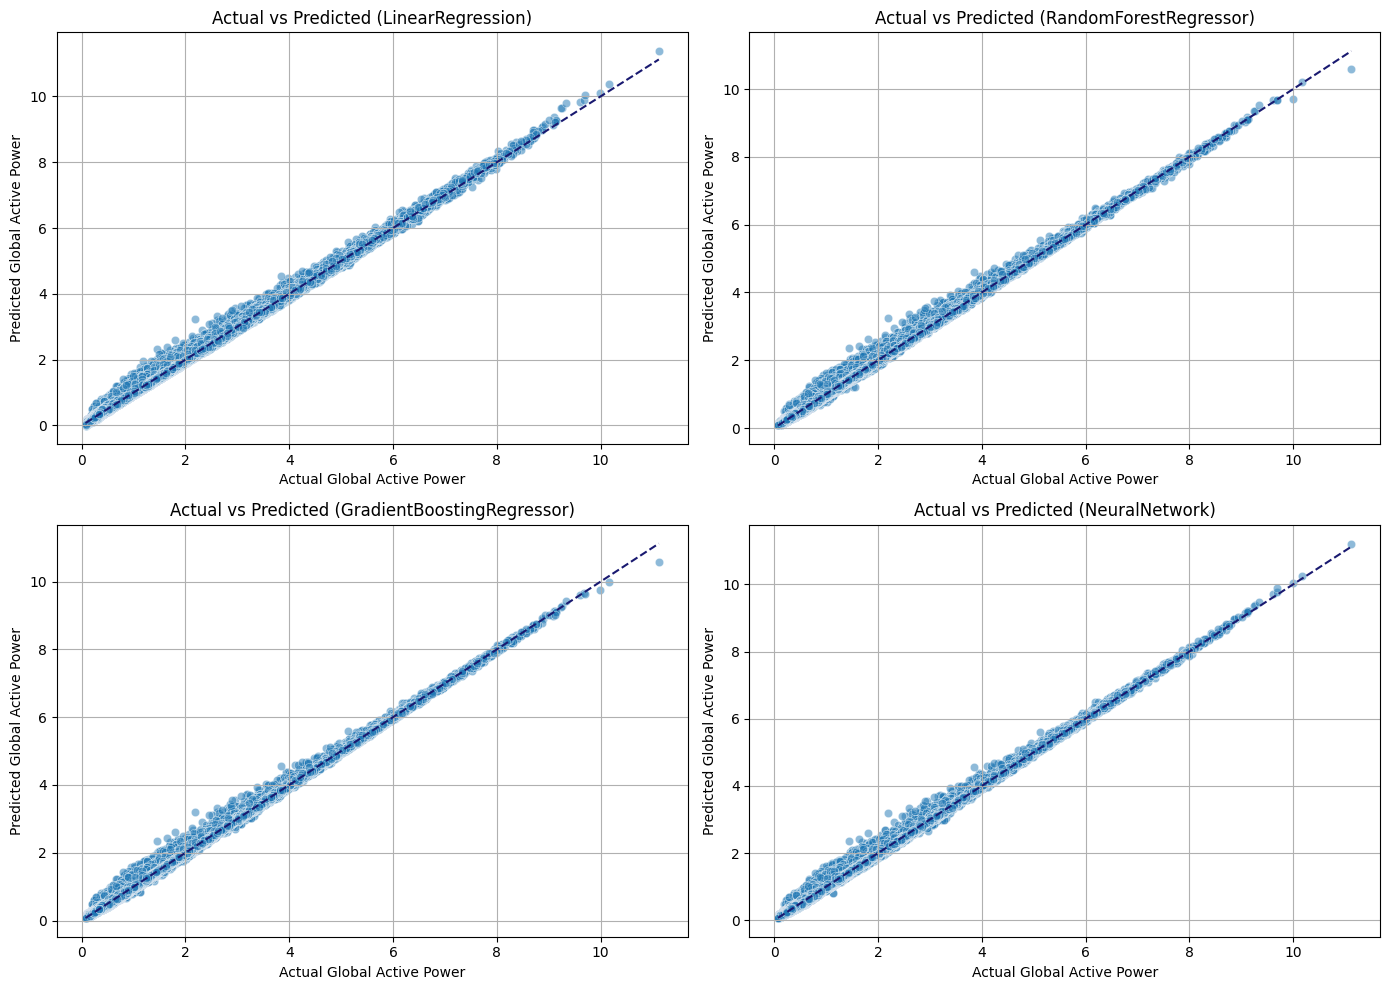

In [ ]:
# Actual vs Predicted Global Active Power for Multiple Models:-
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy Iteration.

# This loop will plot a scatter plot for each model's predictions,with each model's actual vs predicted values on a separate subplot.
for (model_name, y_pred), ax in zip(predictions.items(), axes):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',color='midnightblue')
    ax.set_title(f"Actual vs Predicted ({model_name})")
    ax.set_xlabel("Actual Global Active Power")
    ax.set_ylabel("Predicted Global Active Power")
    ax.grid() # create a 2x2 grid of plots.
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

**Key observations from the Actual vs Predicted scatter plots for different models:**

**Linear Regression (Top Left):**

Predictions closely follow the red diagonal line, but some deviation is observed at higher values. Performance appears decent, but the model might struggle slightly with non-linearity in the data.

**Random Forest Regressor (Top Right):**

Predictions are well-aligned with the actual values, showing a strong fit. Minimal deviation indicates the model captures complex patterns effectively. Slight underestimation for higher values.

**Gradient Boosting Regressor (Bottom Left):**

Very close alignment with the actual values, similar to Random Forest. Small deviations at extreme values, but overall strong predictive performance.

**Neural Network (Bottom Right):**

Shows the best alignment with the red diagonal, suggesting high accuracy. Handles higher values well, reducing bias in predictions. Minimal spread in the scatter points, indicating robustness.

Insights: Linear Regression performs well but may struggle with non-linearity.

Random Forest and Gradient Boosting provide strong, accurate predictions with slight variations at higher values.

Neural Network appears to be the most accurate, closely matching the actual values across the entire range.